In [25]:
library(tidyverse) # metapackage of all tidyverse packages
list.files(path = "../input")
library(tidyr)
library("gplots")
library(corrplot)

[1] "nypd-shooting-incident-data-20062021"

<font size="12">**Analysis of "NYPD Shooting Incident dataset"**</font>

<font size="12">**Source**</font> <br>

<font size="5"> The NYPD Shooting Incident dataset is recorded with all shooting incidents occurred in New York City (NYC) since 2006. If used and interpreted cautiously, it could be a valuable reference for researchers and policymakers regarding gun violence in NYC. However, since the dataset also contains some biases, statistical inferences could be misleading if the biases were not properly identified and addressed when interpreting the results of analysis. The dataset can be found and downloaded in .csv format at: https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8 </font>

<font size="12">**Business Understanding**</font> <br>
<font size="5">In this study, the following questions will be answered by the analytic results of the code. </font> <br>
<font size="6">Question 1: Are shooting incidents age-dependent?</font> <br>
<font size="6">Question 2: Are shooting incidents race-dependent? </font> <br>
<font size="6">Question 3: Are shooting incidents sex-dependent? </font> <br>

<font size="12">**Data Understanding**</font>

In [26]:
nypd <- read_csv("../input/nypd-shooting-incident-data-20062021/NYPD Shooting Incident - Data 2006-2021.csv")
head(nypd)

Rows: 23865 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): OCCUR_DATE, BORO, LOCATION_DESC, PERP_AGE_GROUP, PERP_SEX, PERP_R...
dbl   (5): INCIDENT_KEY, PRECINCT, JURISDICTION_CODE, Latitude, Longitude
num   (2): X_COORD_CD, Y_COORD_CD
lgl   (1): STATISTICAL_MURDER_FLAG
time  (1): OCCUR_TIME

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
226323781,3/30/2021,23:45:00,QUEENS,100,0,MULTI DWELL - PUBLIC HOUS,FALSE,NA,NA,NA,25-44,M,BLACK,1036867,153432,40.58766,-73.81056,POINT (-73.81055977899997 40.587663570000075)
226323779,3/30/2021,16:20:00,BROOKLYN,73,2,MULTI DWELL - PUBLIC HOUS,FALSE,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.68165,-73.90879,POINT (-73.90879049699998 40.68164709200005)
226323782,3/30/2021,23:15:00,BRONX,42,2,MULTI DWELL - PUBLIC HOUS,FALSE,NA,NA,NA,18-24,M,BLACK,1012074,240410,40.82651,-73.89946,POINT (-73.89946470899997 40.82650984800006)
226321042,3/30/2021,13:35:00,MANHATTAN,7,0,NA,FALSE,18-24,M,BLACK,18-24,M,BLACK,987721,202253,40.72182,-73.98748,POINT (-73.98747935099993 40.72182201900005)
226320600,3/30/2021,22:23:00,BRONX,45,0,NA,TRUE,NA,NA,NA,18-24,M,BLACK HISPANIC,1032091,241976,40.83072,-73.82713,POINT (-73.82712605899997 40.83072232800004)
226321041,3/30/2021,02:25:00,BRONX,44,0,NA,FALSE,NA,NA,NA,<18,M,BLACK,1004227,237572,40.81874,-73.92783,POINT (-73.92782678799993 40.818741576000036)


<font size="12">**Data Cleaning**</font>

In [27]:
# Remove  Columns: "Latitude", "Longitude", "Lon_Lat", "X_COORD_CD","Y_COORD_CD", "LOCATION_DESC", "PRECINCT", "JURISDICTION_CODE"
drop_cols = c("Latitude", "Longitude", "Lon_Lat", "X_COORD_CD","Y_COORD_CD", "LOCATION_DESC", "PRECINCT", "JURISDICTION_CODE")
nypd_clean <- nypd[,!names(nypd) %in% drop_cols]
head(nypd_clean)

INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
<dbl>,<chr>,<time>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
226323781,3/30/2021,23:45:00,QUEENS,FALSE,NA,NA,NA,25-44,M,BLACK
226323779,3/30/2021,16:20:00,BROOKLYN,FALSE,25-44,M,BLACK,25-44,M,BLACK
226323782,3/30/2021,23:15:00,BRONX,FALSE,NA,NA,NA,18-24,M,BLACK
226321042,3/30/2021,13:35:00,MANHATTAN,FALSE,18-24,M,BLACK,18-24,M,BLACK
226320600,3/30/2021,22:23:00,BRONX,TRUE,NA,NA,NA,18-24,M,BLACK HISPANIC
226321041,3/30/2021,02:25:00,BRONX,FALSE,NA,NA,NA,<18,M,BLACK


<font size="5"> 1. Coordinate information is eliminated since this study does not intend to fit the incidents into the map. </font> <br>
<font size="5"> 2.PRECINCT and JURISDICTION_CODE are eliminated since law enforcement is beyond the scope of this study. </font>

<font size="12">**Visualization**</font>


        BRONX      BROOKLYN     MANHATTAN        QUEENS STATEN ISLAND 
         6794          9826          2974          3568           703 

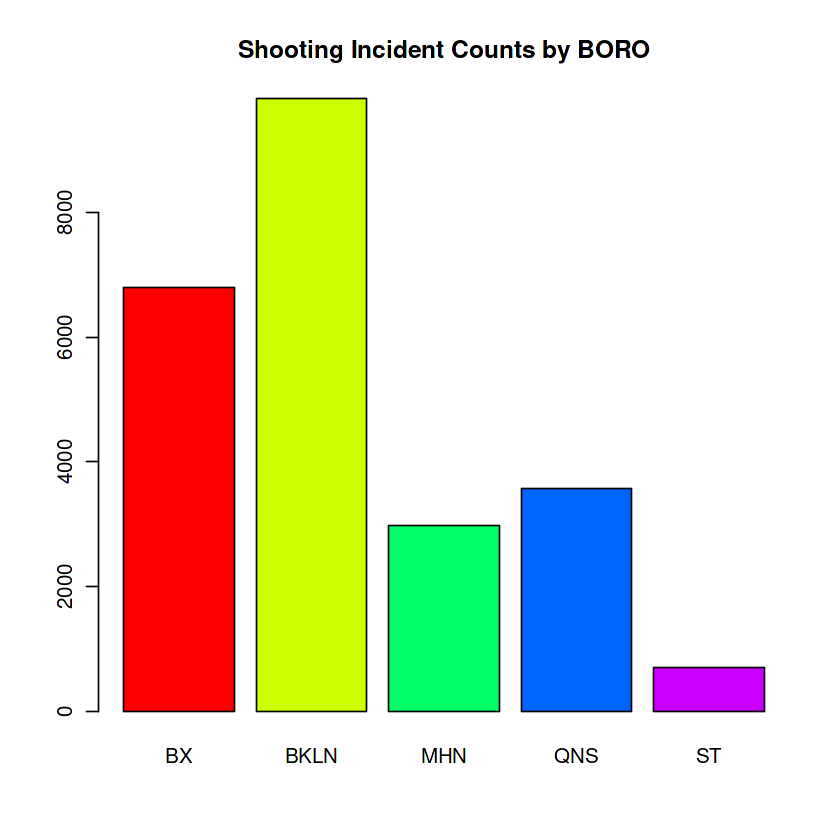

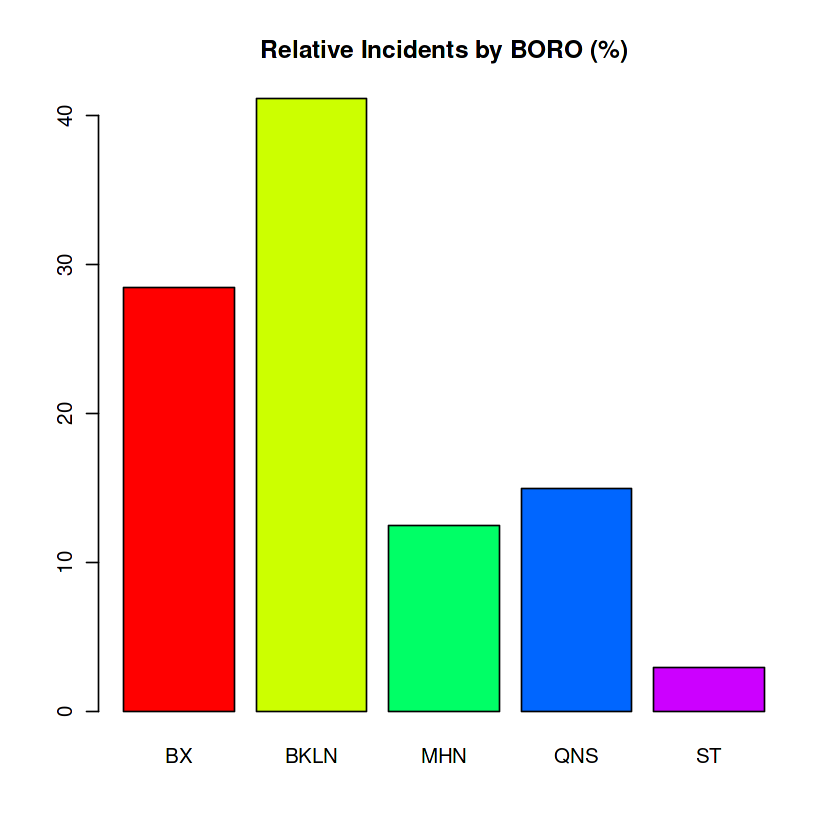

In [28]:
# Frequency table: shooting incident by borough
boro_cnt <- table(nypd_clean["BORO"])
boro_cnt
names(boro_cnt) <- c("BX","BKLN","MHN","QNS","ST")
b1 <- barplot(boro_cnt, main = "Shooting Incident Counts by BORO", col = rainbow(5))
b2 <- barplot(prop.table(boro_cnt)*100, main = "Relative Incidents by BORO (%)", col = rainbow(5))

<font size="5">Brooklyn has the most shooting incidents, followed by Bronx.</font>

<font size="12">**Modeling**</font>

<font size="5"> Convert the murder flag into binary value for binomial regression purposes. </font>

In [29]:

nypd_clean$MURDER_FLAG <- as.integer(as.logical(nypd_clean$STATISTICAL_MURDER_FLAG))

perp_age_cnt <- table(nypd_clean["PERP_AGE_GROUP"])
perp_age_cnt
nypd_clean <- nypd_clean[(nypd_clean$PERP_AGE_GROUP %in% c("<18","18-24","25-44","45-64","65+","UNKNOWN")),]
perp_age_cnt <- table(nypd_clean["PERP_AGE_GROUP"])
perp_age_cnt


    <18    1020   18-24     224   25-44   45-64     65+     940 UNKNOWN 
   1371       1    5497       1    4667     487      55       1    3156 


    <18   18-24   25-44   45-64     65+ UNKNOWN 
   1371    5497    4667     487      55    3156 

In [30]:
#b3 <- barplot(perp_age_cnt, main = "Shooting Incident Counts by PERP_AGE_GROUP", col = rainbow(6))
#b4 <- barplot(prop.table(perp_age_cnt)*100, main = "Relative Shooting Incidents by PERP_AGE_GROUP (%)", col = rainbow(6))

<font size="5">Age group 18-24 accounts for the lion's share of the shooting perpetrators, followed by Age group 25-44.</font> <br>
<font size="5">Leave it later to visualize the PERP_AGE_GROUP and VIC_AGE_GROUP altogether.</font>

In [31]:
summary(glm(MURDER_FLAG ~ PERP_AGE_GROUP,data =nypd_clean,family = "binomial" ))


Call:
glm(formula = MURDER_FLAG ~ PERP_AGE_GROUP, family = "binomial", 
    data = nypd_clean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0408  -0.6747  -0.6747  -0.2664   2.5910  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.51033    0.07016 -21.526  < 2e-16 ***
PERP_AGE_GROUP18-24    0.14617    0.07775   1.880   0.0601 .  
PERP_AGE_GROUP25-44    0.49046    0.07761   6.320 2.62e-10 ***
PERP_AGE_GROUP45-64    0.89625    0.11805   7.592 3.14e-14 ***
PERP_AGE_GROUP65+      1.18009    0.28223   4.181 2.90e-05 ***
PERP_AGE_GROUPUNKNOWN -1.81077    0.11976 -15.120  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14853  on 15232  degrees of freedom
Residual deviance: 13910  on 15227  degrees of freedom
AIC: 13922

Number of Fisher Scoring iterations: 6


<font size="5"> Considering a common significance level 0.05, most coefficients are statistically signifcant except AGE_GROUP 18-24.</font> <br>
<font size="5"> A concerning trend is given 1-unit increment in the age group, the log odds of murdering shooting incidents increases more sharply with seniority.</font> <br>
<font size="12">**Bias 1: In the attribute PERP_AGE_GROUP, AGE_GROUP 65+ are not well-represented since it accounts for only 1% population of AGE_GROUP 18-24 and noticeably lower than other age groups.**</font>

In [32]:
chi_sq <- 1 - pchisq(14853-13910, df=(15232-15227))
chi_sq

[1] 0

<font size="5">Since chi_sq = 0 is much smaller than the significance level 0.05, the perpetrator age model is useful in predicting murdering shooting incidents.</font>

In [33]:
vic_age_cnt <- table(nypd_clean["VIC_AGE_GROUP"])
vic_age_cnt
#b5 <- barplot(vic_age_cnt, main = "Shooting Incident Counts by VIC_AGE_GROUP", col = rainbow(5))
#b6 <- barplot(prop.table(vic_age_cnt)*100, main = "Relative Shooting Incidents by VIC_AGE_GROUP (%)", col = rainbow(5))


    <18   18-24   25-44   45-64     65+ UNKNOWN 
   1796    5739    6480    1042     118      58 

<font size="5">Age group 25-44 accounts for the lion's share of the shooting victims, followed by Age group 18-24.</font> <br>
<font size="5">Leave it later to visualize the PERP_AGE_GROUP and VIC_AGE_GROUP altogether.</font> <br>
<font size="12">**Bias 2: In the attribute VIC_AGE_GROUP, AGE_GROUP 65+ and AGE_GROUP_UNKOWN are not well-represented since they account for less than 2% population of AGE_GROUP 25-44 and noticeably lower than other age groups.**</font>

In [34]:
summary(glm(MURDER_FLAG ~ VIC_AGE_GROUP,data =nypd_clean,family = "binomial" ))


Call:
glm(formula = MURDER_FLAG ~ VIC_AGE_GROUP, family = "binomial", 
    data = nypd_clean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8817  -0.6949  -0.6106  -0.5284   2.0189  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.89840    0.07010 -27.082  < 2e-16 ***
VIC_AGE_GROUP18-24    0.31323    0.07841   3.995 6.48e-05 ***
VIC_AGE_GROUP25-44    0.60043    0.07635   7.864 3.72e-15 ***
VIC_AGE_GROUP45-64    0.78695    0.10033   7.844 4.36e-15 ***
VIC_AGE_GROUP65+      1.15396    0.20912   5.518 3.42e-08 ***
VIC_AGE_GROUPUNKNOWN  0.55467    0.33164   1.672   0.0944 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14853  on 15232  degrees of freedom
Residual deviance: 14735  on 15227  degrees of freedom
AIC: 14747

Number of Fisher Scoring iterations: 4


<font size="5"> Considering a common significance level 0.05, most coefficients are statistically signifcant except AGE_GROUP UNKNOWN.</font> <br>
<font size="5"> Given 1-unit increment in the age group, seniors are more vulnerable to murdering shooting incidents according to the log odds.</font>

In [35]:
perp_race_cnt <- table(nypd_clean["PERP_RACE"])
perp_race_cnt


AMERICAN INDIAN/ALASKAN NATIVE       ASIAN / PACIFIC ISLANDER 
                             2                            120 
                         BLACK                 BLACK HISPANIC 
                          9943                           1094 
                       UNKNOWN                          WHITE 
                          1836                            256 
                WHITE HISPANIC 
                          1982 

<font size="5"> Black perpetrators account for the absolute majority, followed by white-Hispanic ones. </font> <br>
<font size="5">Leave it later to visualize the PERP_RACE and VIC_RACE altogether.</font>

In [36]:
vic_race_cnt <- table(nypd_clean["VIC_RACE"])
vic_race_cnt


AMERICAN INDIAN/ALASKAN NATIVE       ASIAN / PACIFIC ISLANDER 
                             7                            237 
                         BLACK                 BLACK HISPANIC 
                         10397                           1510 
                       UNKNOWN                          WHITE 
                            71                            479 
                WHITE HISPANIC 
                          2532 

<font size="5"> Black victims account for the absolute majority, followed by white-Hispanic ones. </font> <br>
<font size="5">Leave it later to visualize the PERP_RACE and VIC_RACE altogether.</font>

In [37]:
summary(glm(MURDER_FLAG ~ PERP_SEX + 0,data =nypd_clean,family = "binomial" ))


Call:
glm(formula = MURDER_FLAG ~ PERP_SEX + 0, family = "binomial", 
    data = nypd_clean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7742  -0.6741  -0.6741  -0.3595   2.3542  

Coefficients:
          Estimate Std. Error z value Pr(>|z|)    
PERP_SEXF -1.05154    0.12454  -8.443   <2e-16 ***
PERP_SEXM -1.36612    0.02145 -63.702   <2e-16 ***
PERP_SEXU -2.70660    0.10768 -25.135   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21117  on 15233  degrees of freedom
Residual deviance: 14630  on 15230  degrees of freedom
AIC: 14636

Number of Fisher Scoring iterations: 5


In [38]:
summary(glm(MURDER_FLAG ~ VIC_SEX + 0,data =nypd_clean,family = "binomial" ))


Call:
glm(formula = MURDER_FLAG ~ VIC_SEX + 0, family = "binomial", 
    data = nypd_clean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7115  -0.6438  -0.6438  -0.6438   2.2293  

Coefficients:
         Estimate Std. Error z value Pr(>|z|)    
VIC_SEXF -1.24475    0.05998 -20.752   <2e-16 ***
VIC_SEXM -1.46863    0.02197 -66.850   <2e-16 ***
VIC_SEXU -2.39789    1.04403  -2.297   0.0216 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21117  on 15233  degrees of freedom
Residual deviance: 14840  on 15230  degrees of freedom
AIC: 14846

Number of Fisher Scoring iterations: 4


<font size="12">**Additional Visualization Inspired by Modeling**</font>

<font size="5"> Use ballon plot to display contengency tables </font>

                                VIC_RACE
PERP_RACE                        AMERICAN INDIAN/ALASKAN NATIVE
  AMERICAN INDIAN/ALASKAN NATIVE                              0
  ASIAN / PACIFIC ISLANDER                                    0
  BLACK                                                       4
  BLACK HISPANIC                                              0
  UNKNOWN                                                     3
  WHITE                                                       0
  WHITE HISPANIC                                              0
                                VIC_RACE
PERP_RACE                        ASIAN / PACIFIC ISLANDER BLACK BLACK HISPANIC
  AMERICAN INDIAN/ALASKAN NATIVE                        0     2              0
  ASIAN / PACIFIC ISLANDER                             38    37             12
  BLACK                                               126  7888            687
  BLACK HISPANIC                                       17   446            280
  UNKNOWN  

         VIC_RACE
PERP_RACE   NA   AP    B   BH    U    W   WH
       NA    0    0    2    0    0    0    0
       AP    0   38   37   12    2   11   20
       B     4  126 7888  687   37  162 1039
       BH    0   17  446  280    6   31  314
       U     3   14 1357  158   12   41  251
       W     0   11   29   18    1  151   46
       WH    0   31  638  355   13   83  862

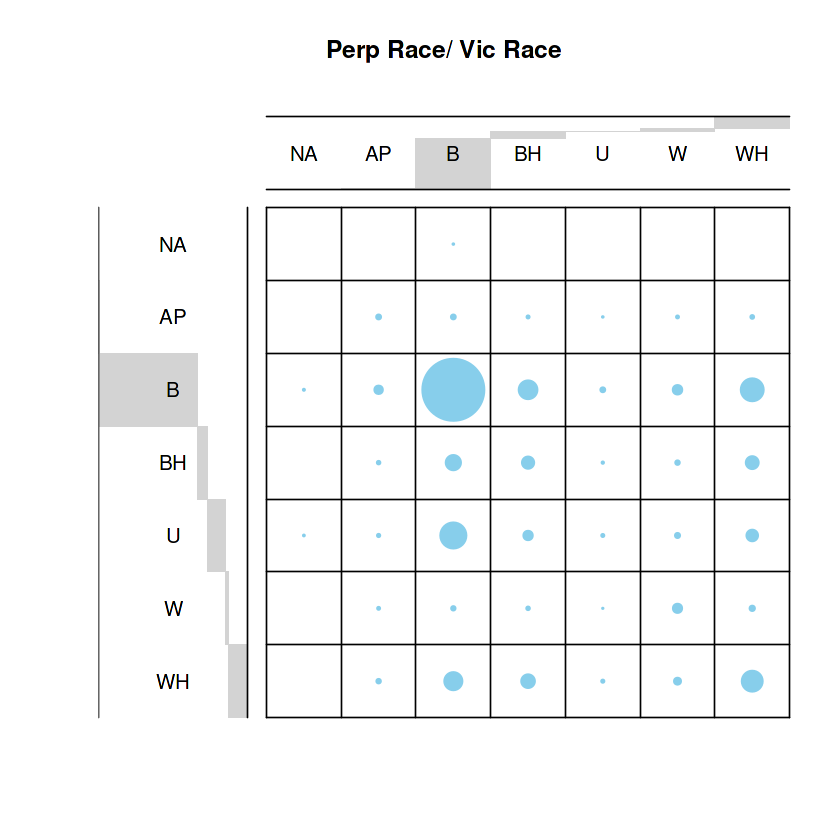

In [39]:
#pv_race_cnt <- table(nypd_clean["PERP_RACE","VIC_RACE"])
pv_race_cnt <- with(nypd_clean,table(PERP_RACE,VIC_RACE))
pv_race_cnt
colnames(pv_race_cnt) <-c("NA","AP","B","BH","U","W","WH")
rownames(pv_race_cnt) <-c("NA","AP","B","BH","U","W","WH")
pv_race_cnt
dt <- as.table(as.matrix(pv_race_cnt))
balloonplot(t(dt), main ="Perp Race/ Vic Race", xlab ="", ylab="",label = FALSE, show.margins = FALSE)

<font size="5"> Most shooting incidents are black-on-black. </font>

<font size="5"> Calculate relative contribution of each cell to the total Chi-square score. </font> <br>
<font size="5"> Although this is NOT a correlation matrix, we can use it to study the association between PERP_RACE and VIC_RACE. </font>

In [40]:
chisq_race <- chisq.test(pv_race_cnt)
chisq_race

Warning message in chisq.test(pv_race_cnt):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  pv_race_cnt
X-squared = 5900.4, df = 36, p-value < 2.2e-16


 <font size="5">Since p<< 0.05, the row variables (PERP_RACE) and the column variables (VIC_RACE) are statistically significantly associated. </font>

         VIC_RACE
PERP_RACE      NA      AP       B      BH       U       W      WH
       NA  0.0000  0.0005  0.0050  0.0034  0.0002  0.0011  0.0056
       AP  0.0009 11.8518  0.4172  0.0000  0.0629  0.2346  0.0000
       B   0.0012  0.0902  3.0305  1.5334  0.0319  1.2304  3.8623
       BH  0.0085  0.0000  2.0522  4.5996  0.0027  0.0057  1.6278
       U   0.0934  0.1259  0.1459  0.0536  0.0235  0.0822  0.1630
       W   0.0020  0.2095  2.0599  0.0363  0.0005 43.0229  0.0047
       WH  0.0154  0.0000  6.4008  2.1680  0.0260  0.1163 14.5905

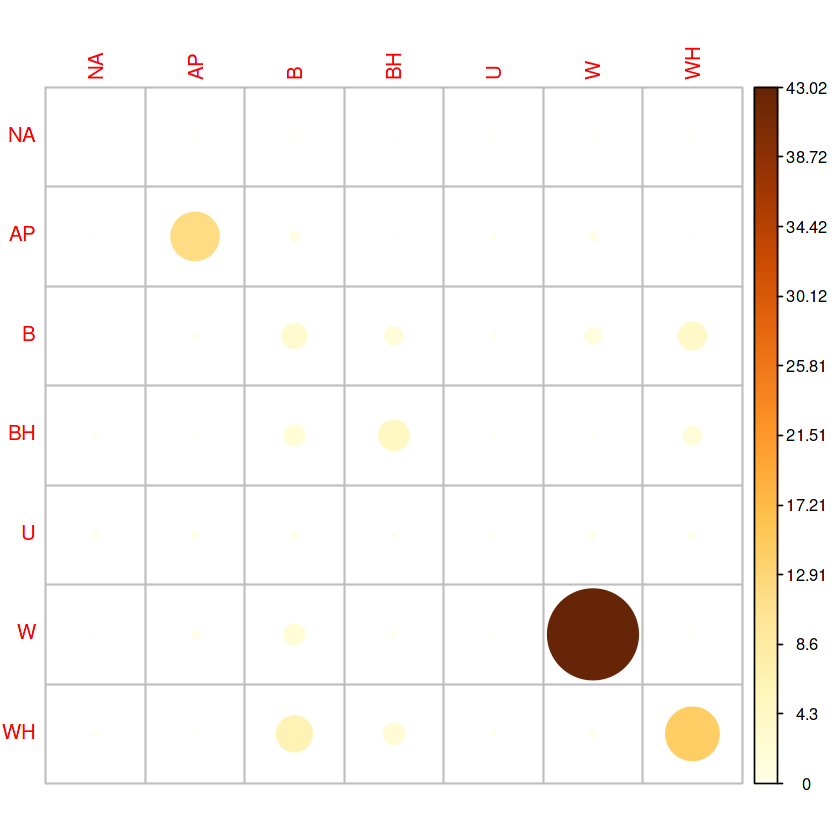

In [41]:
race_contrib <- 100*chisq_race$residuals^2/chisq_race$statistic
round(race_contrib, 4)
corrplot(race_contrib, is.cor = FALSE)

              VIC_AGE_GROUP
PERP_AGE_GROUP  <18 18-24 25-44 45-64  65+ UNKNOWN
       <18      415   553   330    63    8       2
       18-24    715  2461  1988   286   34      13
       25-44    232  1298  2673   390   40      34
       45-64     18    58   260   134   10       7
       65+        0     1    23    21   10       0
       UNKNOWN  416  1368  1206   148   16       2

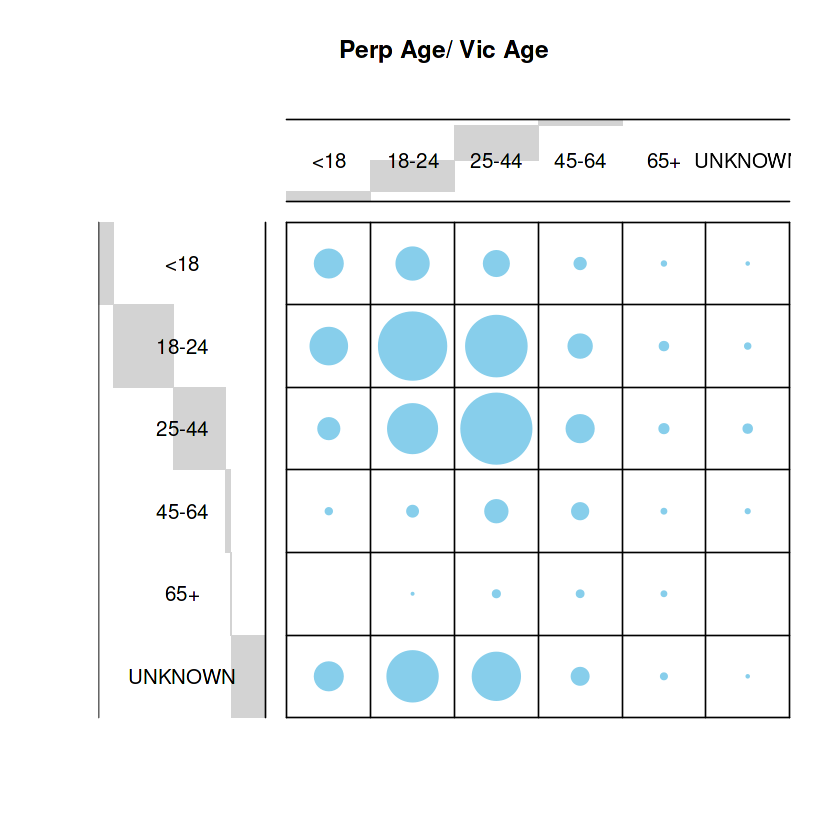

In [42]:
pv_age_cnt <- with(nypd_clean,table(PERP_AGE_GROUP,VIC_AGE_GROUP))
pv_age_cnt

dt2 <- as.table(as.matrix(pv_age_cnt))
balloonplot(t(dt2), main ="Perp Age/ Vic Age", xlab ="", ylab="",label = FALSE, show.margins = FALSE)

In [43]:
perp_sex_cnt <- table(nypd_clean["PERP_SEX"])
perp_sex_cnt


    F     M     U 
  336 13427  1470 

In [44]:
vic_sex_cnt <- table(nypd_clean["VIC_SEX"])
vic_sex_cnt


    F     M     U 
 1601 13620    12 

        VIC_SEX
PERP_SEX     F     M     U
       F    50   285     1
       M  1438 11979    10
       U   113  1356     1

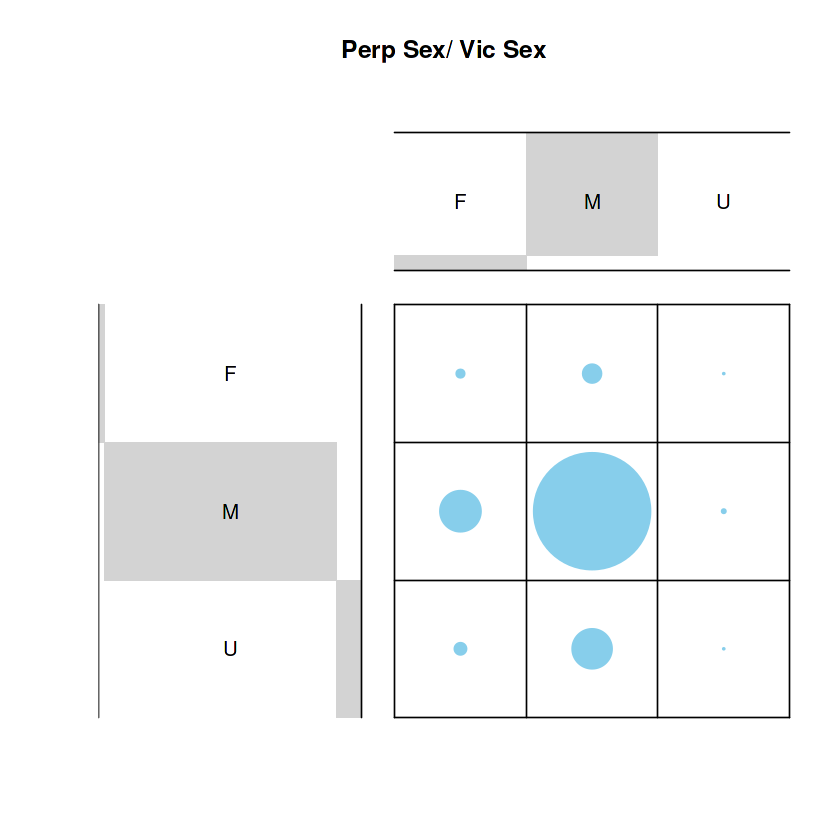

In [45]:
pv_sex_cnt <- with(nypd_clean,table(PERP_SEX,VIC_SEX))
pv_sex_cnt

dt3 <- as.table(as.matrix(pv_sex_cnt))
balloonplot(t(dt3), main ="Perp Sex/ Vic Sex", xlab ="", ylab="",label = FALSE, show.margins = FALSE)

In [46]:
chisq_sex <- chisq.test(pv_sex_cnt)
chisq_sex

Warning message in chisq.test(pv_sex_cnt):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  pv_sex_cnt
X-squared = 22.028, df = 4, p-value = 0.0001978


 <font size="5">Since p<< 0.05, the row variables (PERP_SEX) and the column variables (VIC_SEX) are statistically significantly associated. </font>

In [47]:
pv_age_cnt <- with(nypd_clean,table(PERP_AGE_GROUP,VIC_AGE_GROUP))
pv_age_cnt

              VIC_AGE_GROUP
PERP_AGE_GROUP  <18 18-24 25-44 45-64  65+ UNKNOWN
       <18      415   553   330    63    8       2
       18-24    715  2461  1988   286   34      13
       25-44    232  1298  2673   390   40      34
       45-64     18    58   260   134   10       7
       65+        0     1    23    21   10       0
       UNKNOWN  416  1368  1206   148   16       2

In [48]:
chisq_age <- chisq.test(pv_age_cnt)
chisq_age

Warning message in chisq.test(pv_age_cnt):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  pv_age_cnt
X-squared = 2108.6, df = 25, p-value < 2.2e-16


 <font size="5">Since p<< 0.05, the row variables (PERP_AGE_GROUP) and the column variables (VIC_AGE_GROUP) are statistically significantly associated. </font>

<font size="12">**Takeaways**</font> <br>
<font size="5">To answer the questions stated in the beginning, according to the Chi-sq test: </font> <br>
<font size="6">Question 1: Are shooting incidents age-dependent?</font> <br>
<font size="6">Answer 1: Yes, PERP_AGE_GROUP and VIC_AGE_GROUP are statistically significantly associated.</font> <br>
<font size="6">Question 2: Are shooting incidents race-dependent? </font> <br>
<font size="6">Answer 2: Yes, PERP_RACE and VIC_RACE are statistically significantly associated.</font> <br>
<font size="6">Question 3: Are shooting incidents sex-dependent? </font> <br>
<font size="6">Answer 3: Yes, PERP_SEX and VIC_SEX are statistically significantly associated.</font> <br>